## Customary Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## pandas Specific Data Structures
- Series
- DataFrame

### pandas Series
- one-dimensional labeled array which can hold any data type: ints, strings, floats, objects
- syntax: *series = pd.Series(data, index=index)* where *data* is a Python dictonary or an np ndarray and *index* is a list of axis labels 
- if the Series is created from an ndarray, *index* must be the same length as *data*. If no *index* is passed, [0, ..., len(*data*) - 1] will be used
- Series act similarly to ndarrays and are valid arguments for most *numpy* functions
- Series behave similary to Python dictionaries

#### Instantiating a Series from an ndarray

In [2]:
s1 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print(s1)

a    0.582144
b    1.934844
c    0.651312
d   -1.486512
e   -0.141141
dtype: float64


#### Instantiating a Series from a dictonary

In [3]:
d = {'b' : 1, 'a' : 0, 'c' : 2}
s2 = pd.Series(d)
print(s2)

b    1
a    0
c    2
dtype: int64


#### Slicing a Series

In [4]:
print(s1)

a    0.582144
b    1.934844
c    0.651312
d   -1.486512
e   -0.141141
dtype: float64


In [5]:
print(s1[0])

0.5821444248731195


In [6]:
print(s1[:3])

a    0.582144
b    1.934844
c    0.651312
dtype: float64


In [7]:
print(s1[s1 > s1.median()])

b    1.934844
c    0.651312
dtype: float64


In [8]:
print(s1[[2, 3, 1]])

c    0.651312
d   -1.486512
b    1.934844
dtype: float64


#### Getting and Setting Series Values Like a Dictionary

In [9]:
print(s2)

b    1
a    0
c    2
dtype: int64


In [10]:
print(s2['a'])

0


In [11]:
s2['e'] = 12.
print(s2)

b     1.0
a     0.0
c     2.0
e    12.0
dtype: float64


In [12]:
print('e' in s2)

True


### pandas DataFrame
- a 2-dimensional labeled data structure with columns of potentially different data types
- can be thought of like a spreadsheet, an SQL table, or a dictonary of Series objects
- can be constructed from: dictionary of 1D ndarrays, lists, dictionaries, or Series, a 2-D ndarray, a Series, or another DataFrame: *df = pd.DataFrame(data=..., index=..., columns=..., ...)*
- can be constructed from a .csv file: *pandas.read_csv(filepath=' ', ... )*
- along with *data*, *index* (row labels) and *columns* (column labels) can be passed as arguments when constructing a DataFrame
- DataFrames can be written as .csv files: *DataFrame.to_csv(path, ..., )*

#### Instantiating a DataFrame From a Dictionary of Series

In [13]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([2., 4., 6.], index=['a', 'b', 'c'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0


#### Instantiating a DataFrame From a Dictionary of ndarrays/Lists

In [14]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [15]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### Instantiating a DataFrame From a List of Dictionaries

In [55]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 'this is a string'}]

pd.DataFrame(data2)

print(type(data2[0]))

print(data2[0])

<class 'dict'>
{'a': 1, 'b': 2}


#### Instantiating a DataFrame From a .csv File

In [17]:
df = pd.read_csv(filepath_or_buffer='C:\\Users\\gray\\Desktop\\CSCI6380\\pandas_presentation\\pandas_excel_import.csv',
                header=None)
df

,0,1,2,3
0,0.45,-1.3,2.40,0.05
1,-3.40,0.0,0.73,-0.65
2,-1.89,0.9,2.03,0.55
3,-1.40,-0.8,0.63,-0.47


#### Writing a DataFrame to a .csv File

In [57]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.244045,0.034798,-0.506657,1.064287
1,1.596817,-0.699752,0.482379,0.506757
2,0.883639,0.025948,-2.052635,2.566912
3,-1.608996,-0.404802,1.171207,0.903822
4,-0.596699,2.561003,-0.579662,0.071059
5,0.423842,1.242855,-0.593584,1.399970
6,1.017827,0.583562,-1.163719,2.376442
7,0.846012,0.374821,-0.734891,-0.835386
8,1.239901,0.723860,-0.608104,2.013628
9,0.547314,-0.850166,1.674825,1.158868


In [58]:
df.to_csv(".\\pandas_excel_export.csv", header=False,index=False)

#### Column Selection, Addition, and Deletion
- DataFrames can be semantically treated like a dictonary in regards to the syntax of getting, setting, and deleting of columns

In [61]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([2., 4., 6.], index=['a', 'b', 'c'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0


In [62]:
df['one']

a    1.0
b    2.0
c    3.0
Name: one, dtype: float64

In [63]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2

df

,one,two,three,flag
a,1.0,2.0,2.0,False
b,2.0,4.0,8.0,False
c,3.0,6.0,18.0,True


In [64]:
del df['two']

df

,one,three,flag
a,1.0,2.0,False
b,2.0,8.0,False
c,3.0,18.0,True


#### DataFrame Indexing/Selection 
- to select a column:                  *df[col]*
- to select a row by label:            *df.loc[label]*
- to select a row by integer location: *df.iloc[loc]*
- to slice rows:                       *df[5:10]*
- to select rows by boolean vector:    *df[bool_vec]*

In [65]:
df

,one,three,flag
a,1.0,2.0,False
b,2.0,8.0,False
c,3.0,18.0,True


In [66]:
df['flag']

a    False
b    False
c     True
Name: flag, dtype: bool

In [67]:
df.loc['b']

one          2
three        8
flag     False
Name: b, dtype: object

In [71]:
print(type(df.iloc[2]))

<class 'pandas.core.series.Series'>


#### Viewing a DataFrame
- to view just the top rows: *df.head()*
- to view just the bottom rows: *df.tail()*

In [72]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.576248,-0.407965,0.825956,1.772113
1,-0.172616,-2.130820,-2.276251,-0.919292
2,0.016987,0.889727,-1.171383,0.209405
3,1.045354,1.242728,-0.892243,-0.135980
4,-0.717337,0.022028,-0.161801,0.529072
5,0.556536,-1.070655,0.437630,0.025593
6,-0.549096,-0.198549,-1.497285,1.050579
7,0.071145,1.268451,-0.415087,1.420467
8,-0.843635,-2.123552,0.757295,-0.847349
9,-0.820926,-2.242280,-1.611176,-0.981577


In [29]:
df.head(2)

,A,B,C,D
0,-0.455425,0.399808,1.164726,-0.139869
1,0.531753,-1.454215,-1.487455,-0.127942


In [30]:
df.tail(2)

,A,B,C,D
8,-0.158292,0.148443,2.004386,1.200317
9,0.544383,-1.526491,-1.566987,-0.285593


#### DataFrame Summary Statistics, Statistical Attributes, and Sorting
- get basic, summary statistics: *df.describe(...)*
- get the min/max for each row(1) / column(0): *df.min(axis=...,...)/df.max(axis=...,...)*
- get the sum of each row(1) / column(0): *df.sum(axis= )*
- sort values in a DataFrame row or column: *df.sort_values(by=...,axis=...,ascending=...,...)*

In [73]:
df

,A,B,C,D
0,0.576248,-0.407965,0.825956,1.772113
1,-0.172616,-2.130820,-2.276251,-0.919292
2,0.016987,0.889727,-1.171383,0.209405
3,1.045354,1.242728,-0.892243,-0.135980
4,-0.717337,0.022028,-0.161801,0.529072
5,0.556536,-1.070655,0.437630,0.025593
6,-0.549096,-0.198549,-1.497285,1.050579
7,0.071145,1.268451,-0.415087,1.420467
8,-0.843635,-2.123552,0.757295,-0.847349
9,-0.820926,-2.242280,-1.611176,-0.981577


In [74]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.083734,-0.475089,-0.600435,0.212303
std,0.658391,1.379138,1.066030,0.982096
min,-0.843635,-2.242280,-2.276251,-0.981577
25%,-0.675277,-1.860328,-1.415809,-0.669507
50%,-0.077814,-0.303257,-0.653665,0.117499
75%,0.435188,0.672803,0.287773,0.920202
max,1.045354,1.268451,0.825956,1.772113


In [33]:
df.min(axis=0)

A   -0.629819
B   -1.526491
C   -1.566987
D   -1.528715
dtype: float64

In [34]:
df.min(axis=1)

0   -0.455425
1   -1.487455
2   -1.517014
3   -1.152270
4   -1.528715
5   -0.512968
6    0.238476
7   -1.070692
8   -0.158292
9   -1.566987
dtype: float64

In [35]:
df.sort_values(by='A',ascending=False)

,A,B,C,D
3,1.499261,0.823984,1.295385,-1.152270
6,1.148588,0.238476,0.990397,0.729204
2,1.075603,-1.517014,-0.443113,-0.403152
9,0.544383,-1.526491,-1.566987,-0.285593
1,0.531753,-1.454215,-1.487455,-0.127942
5,0.421227,-0.512968,0.983361,-0.405177
7,0.212176,-0.387901,-0.618419,-1.070692
8,-0.158292,0.148443,2.004386,1.200317
0,-0.455425,0.399808,1.164726,-0.139869
4,-0.629819,-0.293460,0.561191,-1.528715


#### DataFrame Data Alignment and Arithmetic
- data between DataFrame objects will automatically align on both the column and row indices
- operations with scalars operate as one would expect

In [36]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

df + df2

,A,B,C,D
0,0.646768,-2.071181,-0.400900,NaN
1,1.942926,-0.411752,-1.133602,NaN
2,-3.255511,1.198665,1.030206,NaN
3,-0.907780,-0.913654,-0.861250,NaN
4,-1.757345,1.520399,2.143060,NaN
5,2.327422,0.097614,-1.677190,NaN
6,-0.804503,-1.448647,0.227058,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [37]:
df * 5 + 2

,A,B,C,D
0,0.286700,0.201236,3.416063,2.401817
1,3.866675,1.741375,3.898068,6.049387
2,-8.006379,6.343989,2.324874,-3.919454
3,1.676726,-4.389022,3.314521,-2.314420
4,-0.606312,10.536990,9.790301,12.160635
5,10.138964,-0.891238,1.483322,6.181557
6,1.059664,-1.267371,1.924765,-3.755324
7,-7.107412,-4.678372,-2.870530,-3.312440
8,-3.693366,-2.288502,9.128606,-3.318909
9,12.160176,-2.329513,1.895693,-1.656416


In [38]:
1 / df

,A,B,C,D
0,-2.918345,-2.779687,3.530916,12.443479
1,2.678559,-19.333015,2.634257,1.234755
2,-0.499681,1.151016,15.390576,-0.844672
3,-15.466738,-0.782592,3.803666,-1.158904
4,-1.918420,0.585687,0.641824,0.492095
5,0.614329,-1.729363,-9.677209,1.195727
6,-5.317247,-1.530282,-66.458235,-0.868761
7,-0.549003,-0.748685,-1.026582,-0.941187
8,-0.878215,-1.165908,0.701399,-0.940042
9,0.492117,-1.154864,-47.935649,-1.367459


In [39]:
df ** 4

,A,B,C,D
0,0.013786,0.016750,6.433544e-03,0.000042
1,0.019427,0.000007,2.076669e-02,0.430207
2,16.040864,0.569738,1.782299e-05,1.964476
3,0.000017,2.665983,4.777387e-03,0.554383
4,0.073829,8.498439,5.893007e+00,17.053100
5,7.020960,0.111803,1.140248e-04,0.489184
6,0.001251,0.182353,5.126309e-08,1.755493
7,11.007785,3.182750,9.003781e-01,1.274372
8,1.681111,0.541181,4.131791e+00,1.280590
9,17.050018,0.562181,1.893937e-07,0.285984


#### DataFrame Boolean Operations
- operations involving DataFrames containing bools

In [78]:
df1 = pd.DataFrame({'a' : [1, False, 1], 'b' : [0, 1, 1] }, dtype=bool)
df2 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [79]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [77]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [43]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [44]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [45]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


#### Transposing a DataFrame

In [81]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([2., 4., 6.], index=['a', 'b', 'c'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0


In [47]:
df.T

,a,b,c
one,1.0,2.0,3.0
two,2.0,4.0,6.0


#### Copying DataFrames
- simple assignment will use the same object in memory, but it is possible to make a deep copy

In [48]:
df2 = df
df3 = df.copy()

print('id of df: ',id(df))
print('id of df2:',id(df2))
print('id of df3:',id(df3))

id of df:  1658637251136
id of df2: 1658637251136
id of df3: 1658638807896


## Plotting in Pandas
- line plots: *df.plot(...)*
- bar plots: *df.plot(kind='bar', ...) / df.plot.bar(...)*
- histograms: *df.plot.his(...)*
- scatter plots: *df.plot.scatter(x='a', y='b', ...)*
- pie plots: *Series.plot.pie(...)*

<Figure size 432x288 with 0 Axes>

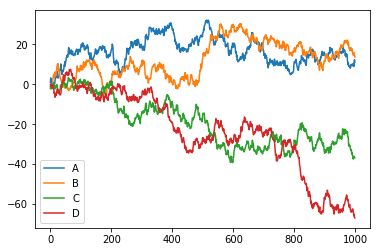

In [85]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=list('ABCD'))
df = df.cumsum()
plt.figure(); df.plot();

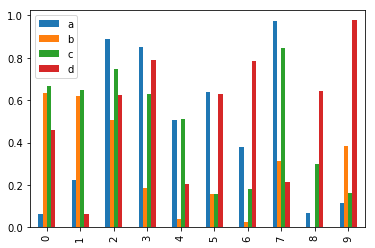

In [86]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar();

<Figure size 432x288 with 0 Axes>

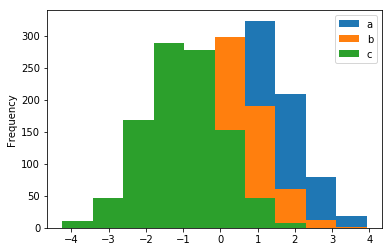

In [88]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();
df4.plot.hist(alpha=1.0)

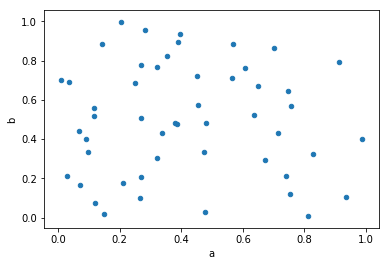

In [51]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a', y='b');

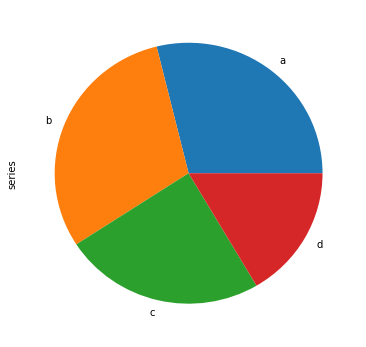

In [52]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6, 6))